In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Classification

In [1]:
import numpy as np
import pandas as pd

In [24]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
import seaborn as sns

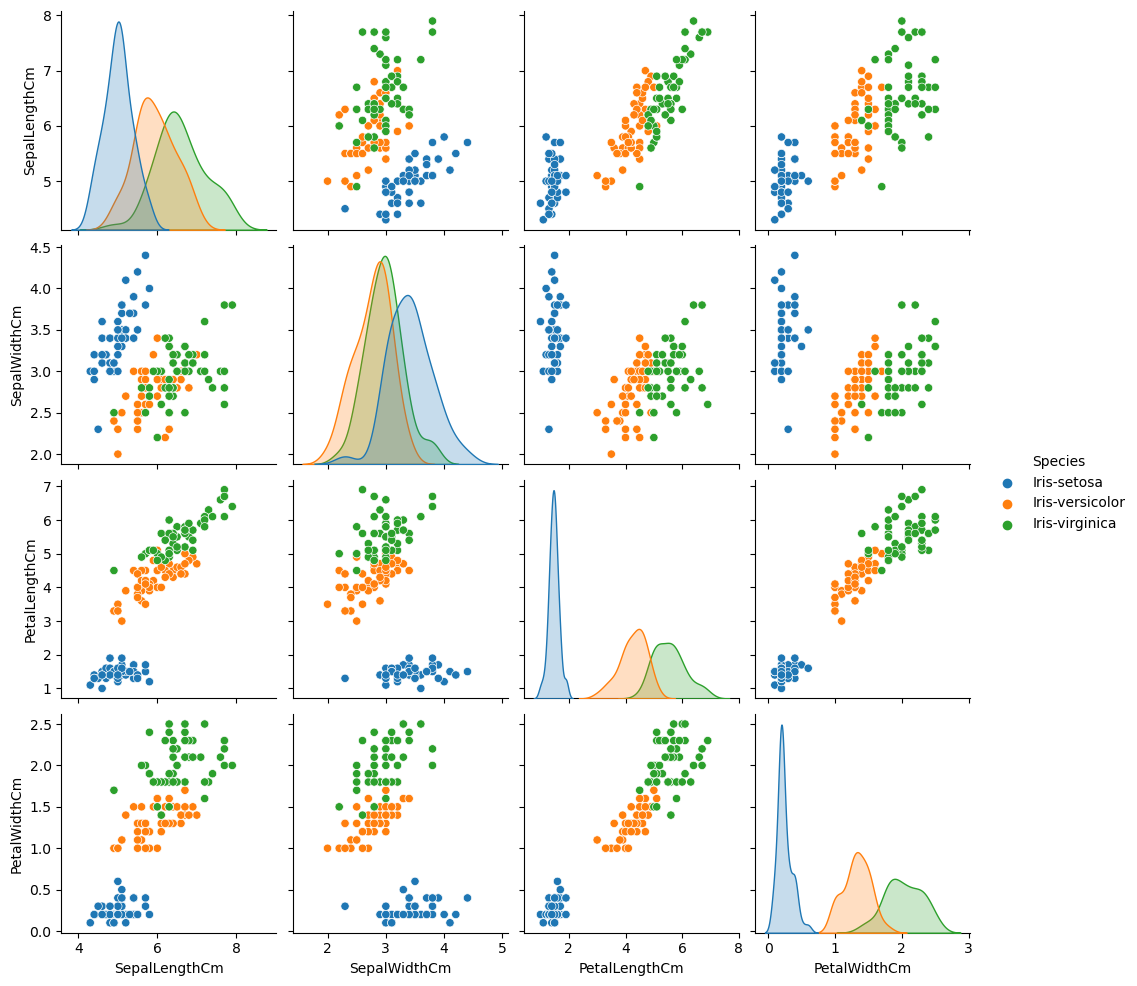

In [29]:
data=data.drop('Id', axis=1)
sns.pairplot(data, hue='Species')

In [30]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


C:\Users\Rajeev Kumar Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

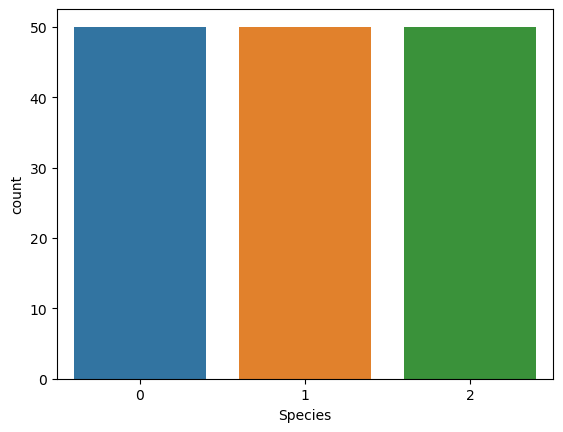

In [38]:
# To count number of instances of each class
sns.countplot(data['Species'])

In [34]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['Species']=en.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

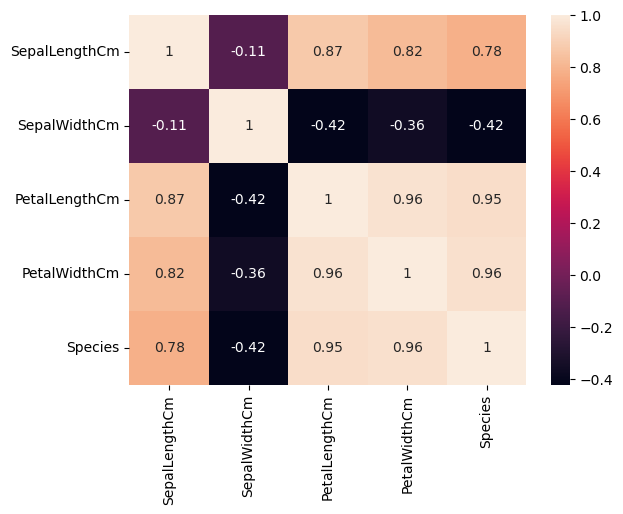

In [35]:
mat=data.corr()
sns.heatmap(mat, annot=True)

In [39]:
x=data.drop('Species', axis=1)
y=data['Species']

In [40]:
y.unique()

array([0, 1, 2], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, random_state=0)
xtrain.shape

(112, 4)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [42]:
pred=model.predict(xtest)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
mat=confusion_matrix(ytest, pred)
print(mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


<AxesSubplot:>

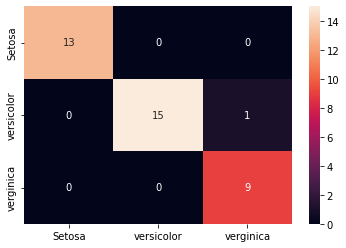

In [45]:
sns.heatmap(mat, annot=True, xticklabels=['Setosa','versicolor','verginica'], yticklabels=['Setosa','versicolor','verginica'])

In [46]:
accuracy_score(ytest, pred)

0.9736842105263158

In [47]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Clustering

# For 2 dimensions

In [2]:
data=pd.read_csv('Mall_Customers_cluster.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# For 2 dimension
X=data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4, random_state=0)
Y=model.fit_predict(X)

In [5]:
Y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

# Elbow Method

C:\Users\Rajeev Kumar Gupta\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

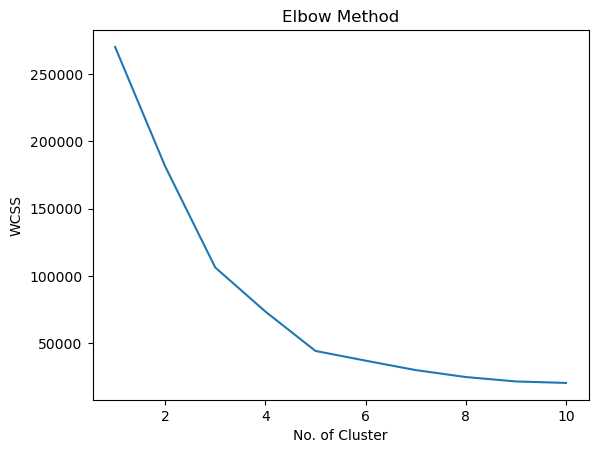

In [7]:
n=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i, random_state=0)
    kmean.fit(X)
    n.append(kmean.inertia_)
plt.plot(range(1,11), n)
plt.title('Elbow Method')
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS")

In [8]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5, random_state=0)
Y=model.fit_predict(X)

In [9]:
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

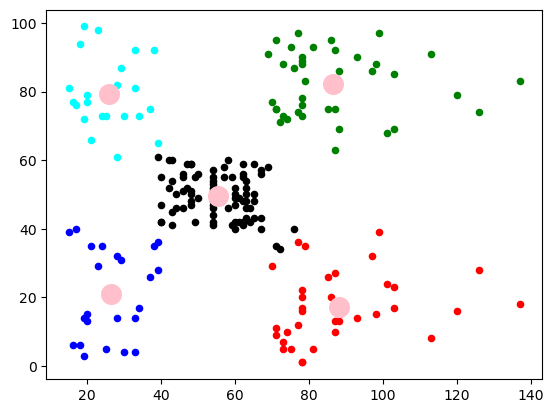

In [10]:
plt.scatter(X[Y==0, 0], X[Y==0,1], c='red',s=20, label='Cluster-0')
plt.scatter(X[Y==1, 0], X[Y==1,1], c='black',s=20, label='Cluster-1')
plt.scatter(X[Y==2, 0], X[Y==2,1], c='green',s=20, label='Cluster-2')
plt.scatter(X[Y==3, 0], X[Y==3,1], c='cyan',s=20, label='Cluster-3')
plt.scatter(X[Y==4, 0], X[Y==4,1], c='blue',s=20, label='Cluster-4')

# Plot 

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='pink', s=200)

# For 2 dimensions

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv('Mall_Customers_cluster.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X=data.iloc[:,[3,4]].values


In [14]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5, linkage='ward',affinity='euclidean')
Y= model.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


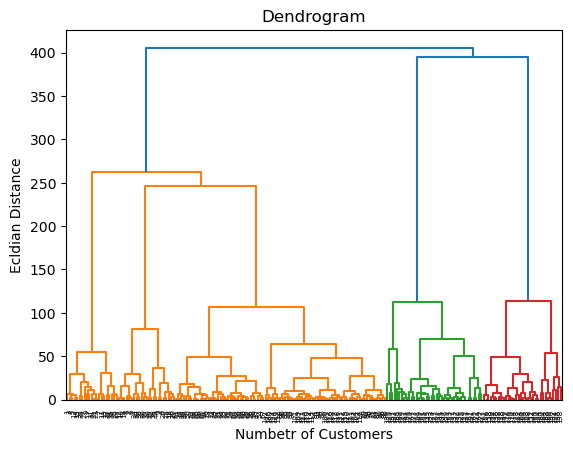

In [58]:
import scipy.cluster.hierarchy as sch
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Numbetr of Customers")
plt.ylabel("Ecldian Distance")
plt.show()

In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(X,Y)

0.5529945955148897

# For N dimensions

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('Mall_Customers_cluster.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['Genre']=en.fit_transform(data['Genre'])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [22]:
X=data.drop('CustomerID', axis=1)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4, random_state=0)
Y=model.fit_predict(X)
Y

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

C:\Users\Rajeev Kumar Gupta\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

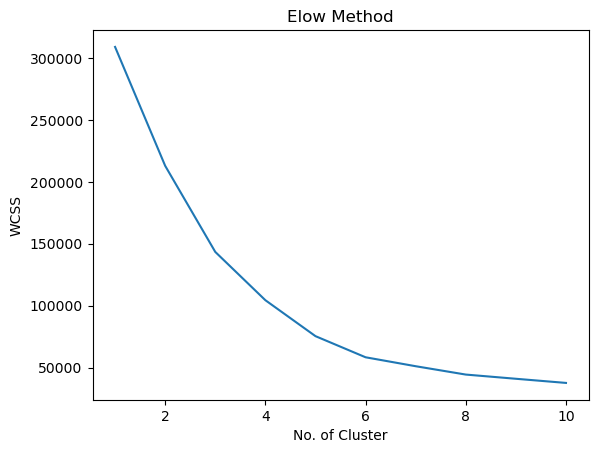

In [23]:
n=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i, random_state=0)
    kmean.fit(X)
    n.append(kmean.inertia_)
plt.plot(range(1,11), n)
plt.title('Elow Method')
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS")